# 네이버 오픈API 활용 크롤링하기
* API: Application Programming Interface의 약자. 이용자가 본인의 애플리케이션 등에서 회사가 제공하는 기술을 사용하기 위한 인터페이스
* API서비스’란 회사가 그와 같은 API를 이용자에게 제공하는 것<br>

## Scrapy로 네이버 Open API 사용하기

In [ ]:
scrapy startproject naveropenapi

In [ ]:
cd naveropenapi/naveropenapi

* 네이버 오픈 API (검색): 

In [ ]:
openapi.naver.com/v1/search/shop.json?query=

In [ ]:
scrapy genspider navershopping <openapi주소>
scrapy genspider navershopping openapi.naver.com/v1/search/shop.json?query=

오픈 api를 사용하여 네이버 쇼핑을 크롤링을 할 시 걱정되는 부분: 인증 정보를 넣어줘야 한다는 것

**Naver Developers의 Application에서 API 신청을 해야 함** 
https://developers.naver.com/apps/#/wizard/register 여기서, https://www.fun-coding.org/crawl_basic3.html 참조하여 신청
<br>
* '애플리케이션 등: 이용자가 API서비스를 적용시키고자 하는 이용자의 애플리케이션, 프로그램 또는 웹사이트 등을 의미합니다.
* '클라이언트 아이디: API를 사용하고자 하는 어플리케이션 등이 API서비스의 이용 승낙을 받은 이용자의 애플레이케이션 등인 것을 식별할 수 있도록 회사가 이용자에게 할당하는 고유한 인증 값

**네이버 오픈 API(인증 정보)** <br>
-> Sublime Text 3에서 navershopping.py 파일을 열고 코드 수정  
1) allowed_domains 코드 지우고 start_requests 함수에 start_urls 함수를 추가하여 작성

In [ ]:
def start_requests(self):
    start_urls = 'http://openapi.naver.com/v1/search/shop.json?query='
    yield scrapy.Request(url=, )

2) client id와 code를 아래 형식으로 start_requests 함수 아래, yield보다 전에 작성

In [ ]:
client_id= ''
client_secret=''

3) 아래 코드도 이어서 추가로 작성

In [ ]:
#'X-Naver-Client-Id':client_id
#'X-Naver-Client-Secret':client_secret

#앞선 코드에서 저장한 client_id와 client_secret 변수를 특정 사전 변수로 만들어서, 각 값에 key를 할당
header_params= {'X-Naver-Client-id':client_id, 'X-Naver-Client-Secret':client_secret}

#query(검색키워드)지정
query= 'iphone'

#yield부분 코드 수정: url=start_urls+query, headers=header_params
yield scrapy.Request(url=start_urls+query, headers=header_para)

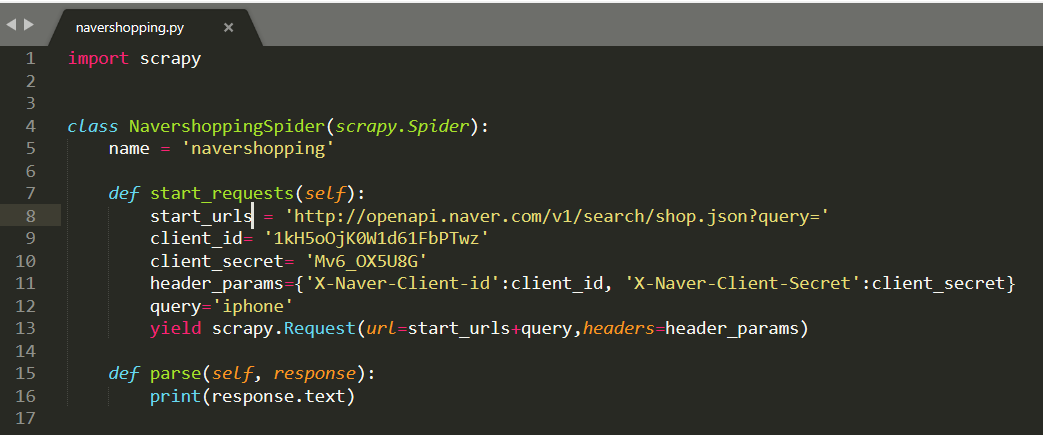

출력을 시도해봅시다: pass 지우고 print(response.text)로 바꿔 보자: 그러면 아래와 같은 에러가 뜬다
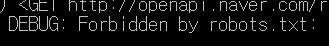

**Forbidden by robots.txt 에러**
* scrapy는 크롤링 시, 해당 서버의 robots.txt를 먼저 다운로드, 해당 파일을 기반으로 허용된 크롤링만 진행
* 오픈API 사용 시에도 동일 메시지가 수신이 가능하므로, 특정 서버에서 허용하지 않는 파일을 크롤링하려면 settings.py파일에서 다음 설정으로 변경 필요

In [ ]:
ROBOTSTXT_OBEY = False

위 코드로 바꾸고 다시 실행 시, 또 다음 에러가 뜬다.
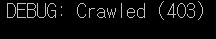

이런 403에러는, url을 쓸 때 http://로 쓰냐 혹은 https://로 쓰냐에 의해 발생할 수 있으므로, 확인 필요.  
크롤링할 url을 https://로 변경 시, 문제없이 크롤링이 됨.<br>
print 결과 화면 일부:

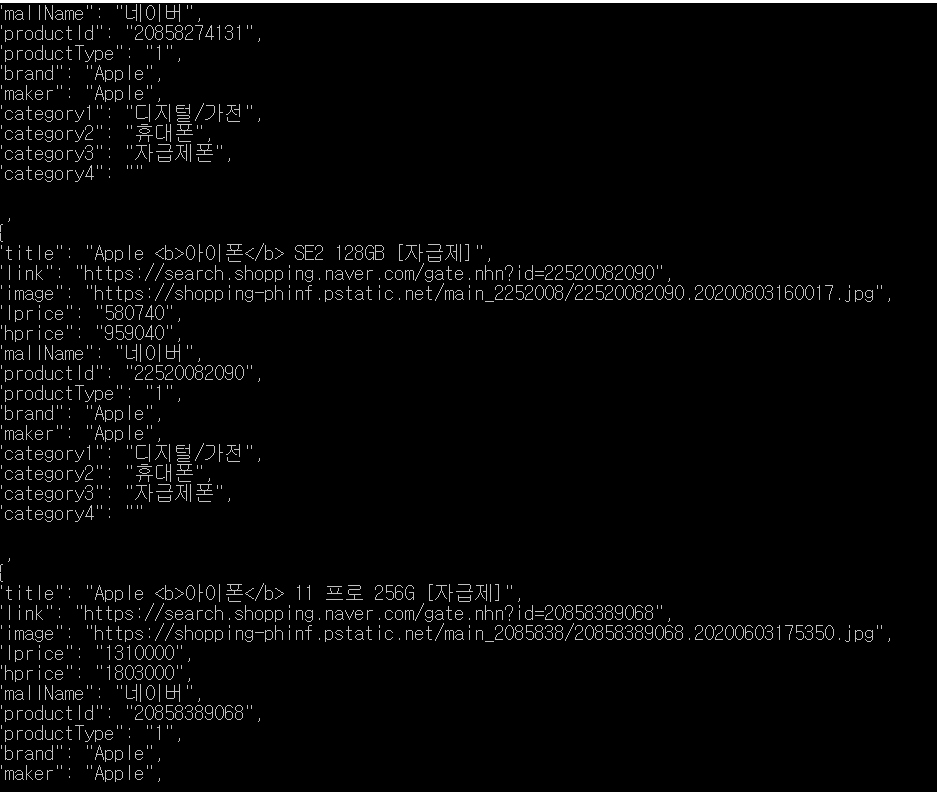

**crawling 결과를 items에 저장:**  
items.py 파일 코드 변경: pass 지우고, 출력된 결과의 구조대로 이름=scrapy.Field()형태로 작성

In [ ]:
    title=scrapy.Field()
    link=scrapy.Field()
    image=scrapy.Field()
    lprice=scrapy.Field()
    hprice=scrapy.Field()
    mallName=scrapy.Field()
    productId=scrapy.Field()
    productType=scrapy.Field()

**JSON 데이터의 크롤링 처리:** <br>
navershopping.py 부분에서 import.json 후, def.parse 함수 코드 수정

In [ ]:
import json

#json library에 있는 loads함수 사용, response를 유니코드화하여 가지고 온다(한글깨짐 방지)
data=json.loads(response.body_as_unicode())
print(response.text)

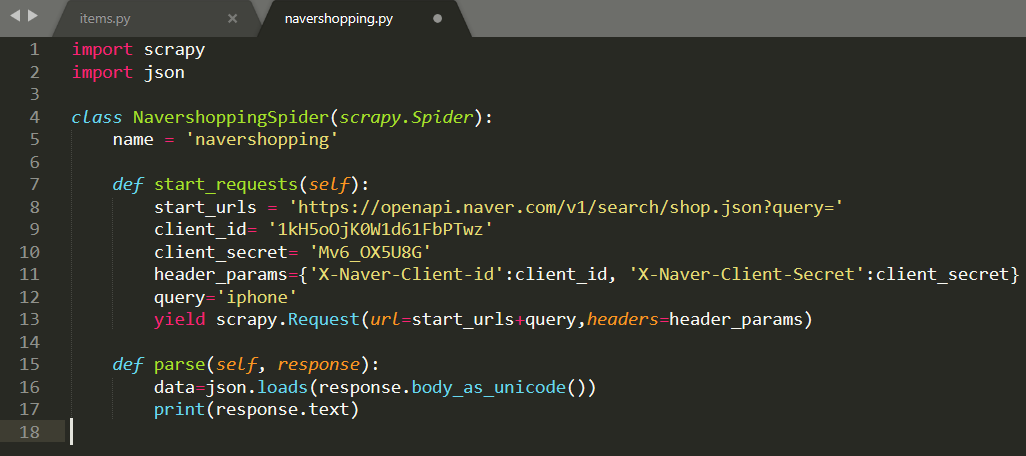

출력 결과를 보면, items.py파일에서 정의한 항목들이 items field 안에 json 데이터가 list 자료 형태로 쭉 들어가 있음이 확인
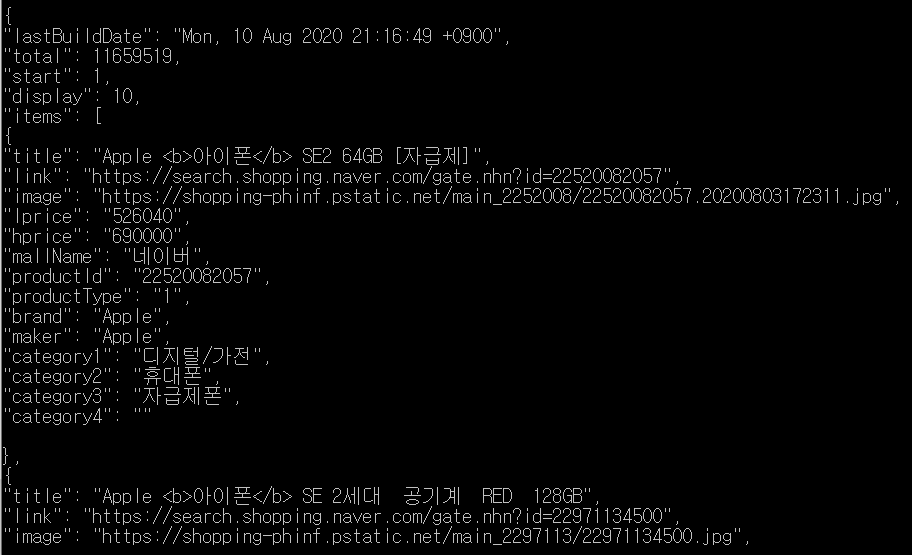

item 중 원하는 항목만 출력되도록 코드를 수정해 보면(ex.title): print()를 지우고, for문 추가

In [ ]:
for item in data['items']:
    print (item['title'])

그러면 다음과 같이 title만 출력됨
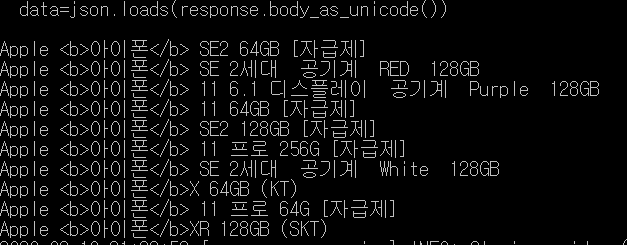

item뿐만 아니라, items.py에서 정의했던 데이터를 모두 순서대로 출력해보겠다.

In [ ]:
#맨 위: naveropenapi의 items파일에서 Naveropenapitem class import
from naveropenapi.items import NaveropenapiItem 

#for문 밑에 클래스를 별도의 이름으로 선언하여 객체 생성
#각 변수에 parsing해서 가져올 데이터를 계속 넣어주도록 코드 순서대로 작성
#데이터를 계속 넣어줄 때마다, items.py파일로 데이터가 넘어가 쌓이도록 yield 코드를 써서 마무리
for item in data['items']:
            doc= NaveropenapiItem() 
            doc['title'] = item['title']
            doc['link'] = item['link']
            doc['lprice'] = item['lprice']
            doc['hprice'] = item['hprice']
            doc['mallName'] = item['mallName']
            doc['productId'] = item['productId']
            doc['productType'] = item['productType']
            yield doc

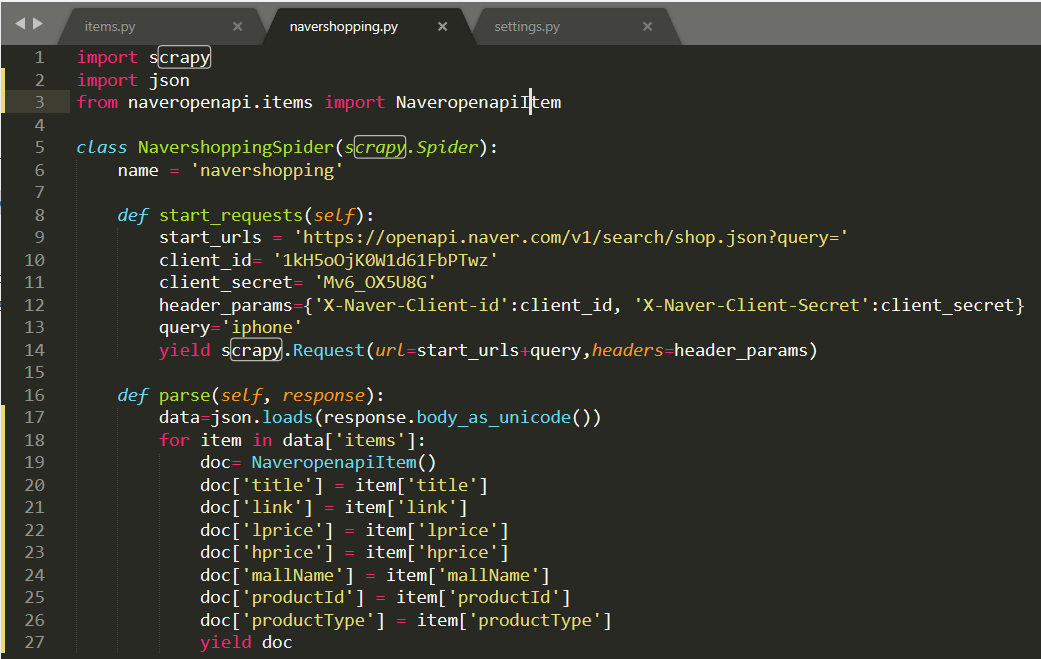
<br>
크롤링 후 결과를 csv파일로 저장.  
이때 csv파일로 저장 시 Field명의 순서가 랜덤하게 저장되므로  
* 크롤링 결과를 전부 출력하고 싶다면 settings.py에서 FEED_EXPORT_FIELDS까지 설정한 후 csv로 저장하겠다

In [ ]:
FEED_EXPORT_FIELDS=['title', 'link', 'image', 'lprice', 'hprice', 'mallName', 'productId', 'productType']

In [ ]:
scrapy crawl navershopping -o navershopping.csv -t csv
#csv파일은 기존에 같은 이름으로 만든 파일을 삭제하지 않고 또 저장하게 되면 overwrite가 되는 것이 아니라 뒤에 이어서 써지기 때문에 주의

csv파일을 열어 보면, title에 tag가 포함되어 출력됨.
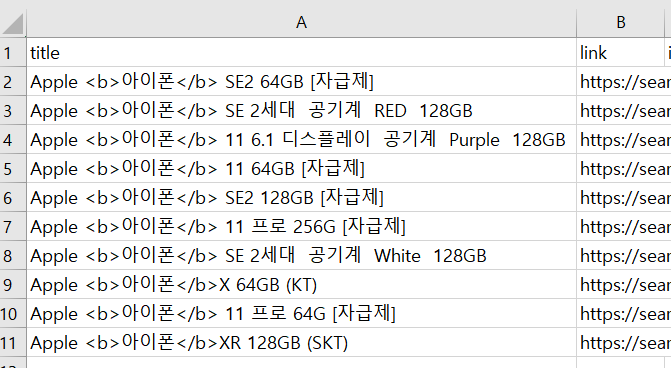
<br>
b 태그만 포함되어 출력되므로, tag를 빼고 순수 text로만 출력하고 싶다면 정규표현식까지 쓸 필요 없이 pipelines.py에서 후처리를 해보겠다. <br>
1) settings.py에서 ITEM_PIPELINES의 주석 해제  
2) pipelines.py 코드 수정: 저번 시간에는 아래 코드를 navershopping.py의 parse함수에 넣어 주었지만, 이렇게 pipeline.py함수에 써 줘도 된다.

In [ ]:
class NaveropenapiPipeline(object): #(object 추가)
    def process_item(self, item, spider):
      item['title'] = item['title'].replace("<b>","").replace("</b>","") #이 줄 추가
      return item

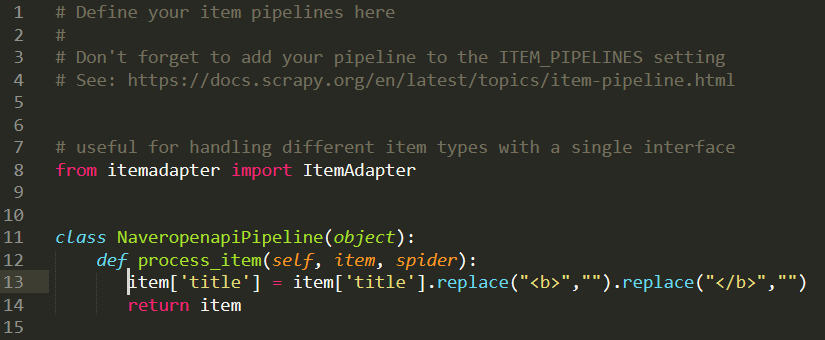

그 후, csv 파일 삭제 후 크롤링 결과를 다시 csv파일로 저장하면 b태그가 삭제된 걸 볼 수 있음.

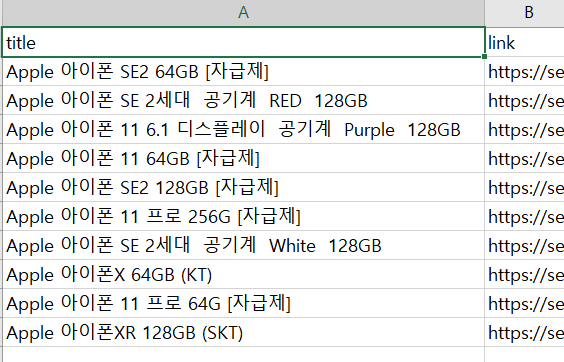

## Scrapy 크롤링 추가 팁

**1. openAPI사용할 때, 기본값에 유의해야 한다. 기본값에서 조정하고 싶다면?**  
아래 요청 변수를 보면 query는 필수로 포함되어야 하고, 기타 변수를 조정할 수 있다

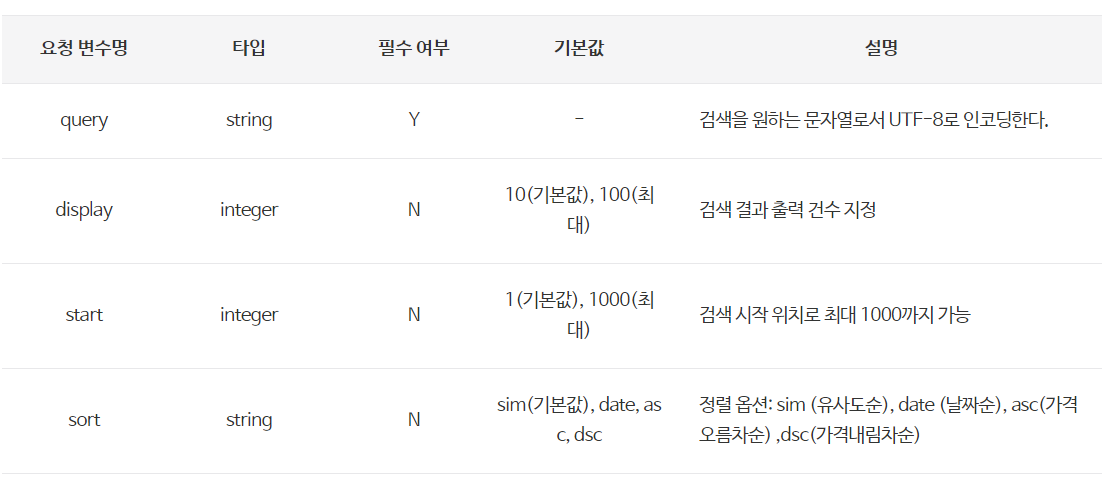

**1) 출력 개수 조정**  
이 경우, start_request 함수의 yield부분 코드를 추가해주면 된다.

In [ ]:
url=start_url+query+''&display=100' 
#그럼 디폴트인 10개가 아니래 100개가 출력되게 된다.
#맨 처음에 start_url에 query를 추가해 줄 때는 ?query= 형식이었고,
#이후 요청변수 값이 yield에 추가될 때에는 &을 써서 추가해 줘야 한다.

기존 csv 파일을 지우고 다시 다운을 해 보면 100개가 크롤링된 걸 확인할 수 있다.
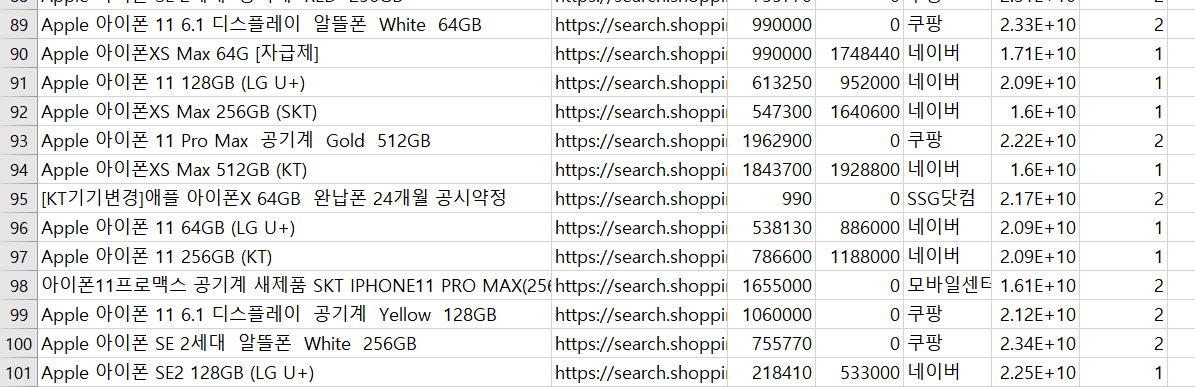

**2) 크롤링 시작 위치 조정: 최대 1100개까지 가져올 수 있다 (시작 위치는 최대 1000까지 가능)**<br>
* navershopping.py의 start_request 코드를 다음과 같이 수정

In [ ]:
for index in range(10): 
            yield scrapy.Request(url=start_urls+query+'&display=100&start='+str(index*100+1),headers=header_params)
#0~9까지의 숫자가 index에 삽입되어 시작점이 각각 0, 101, 201, .... 901로 설정되어 반복 실행되는 코드

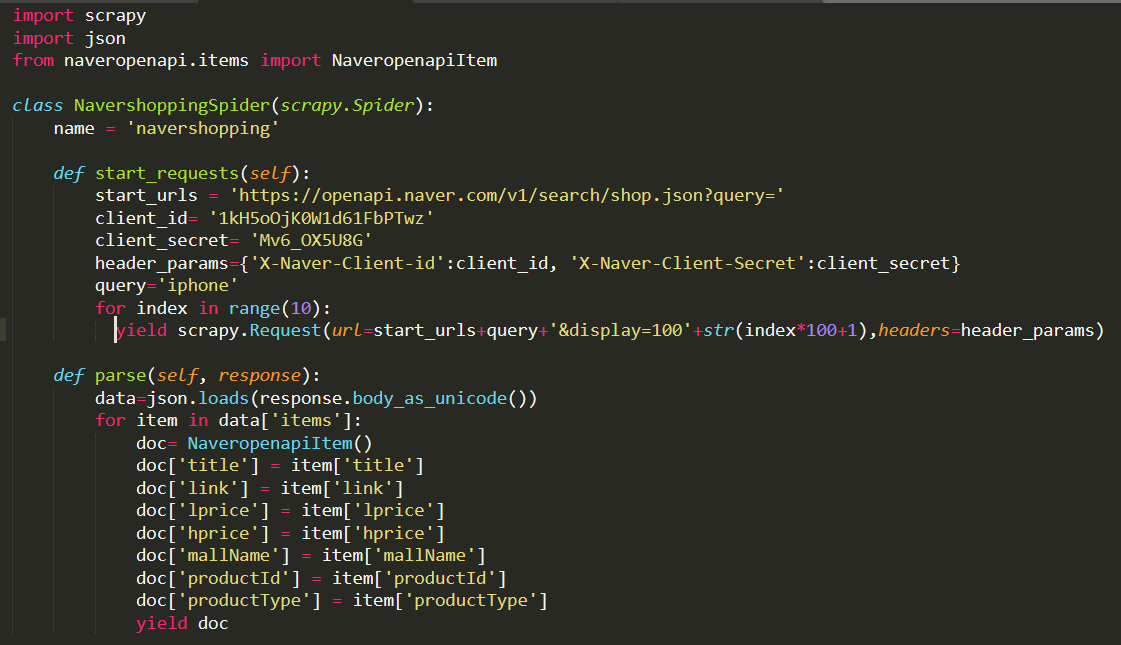

**2. settings.py에서 CONCURRENT_REQUESTS의 주석 해제, 1로 수정:**  
scrapy는 default로 16개의 프로그램이 동시에 크롤링함. 따라서 데이터가 순서대로 저장되지 않고 여러 프로그램이 동시에 크롤링하는 순서대로 저장될 수 있음. 데이터에 랭킹 등의 정보가 있어서, 랭킹 순서대로 그대로 저장되게 할 필요 등이 있을 경우, CONCURRENT_REQUESTS=1로 바꾸어주면 가장 간단하게 해결됨 (1번에 크롤링할 수 있는 사이트는 하나. 따라서 크롤링 결과를 순서대로 저장하도록 함. 대신 속도가 느려짐)
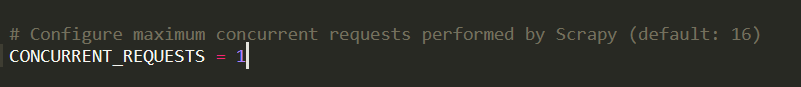

기존에 저장된 csv 파일을 삭제 후 크롤링 결과를 다시 csv파일로 저장하면 1000개가 저장된 걸 볼 수 있음.

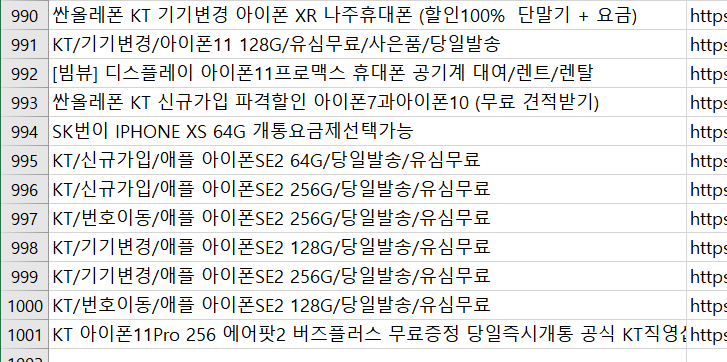